In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importando um novo csv
tmdb=pd.read_csv("/Users/carolinavega/Documents/Alura/archive/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
#criando um df com a contagem por idioma
contagem_lingua=tmdb["original_language"].value_counts().to_frame().reset_index()

contagem_lingua.columns=["original_language", "total"]

In [4]:
contagem_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

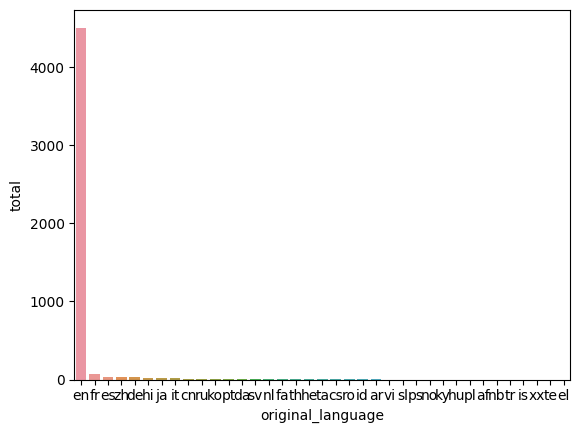

In [5]:
#plotando a quantidade por idioma
sns.barplot(x="original_language", y="total" , data= contagem_lingua)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


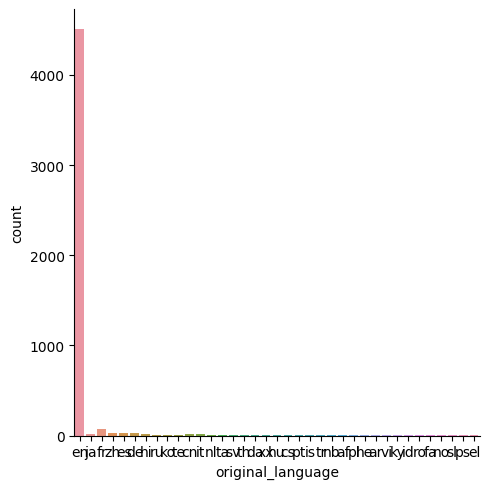

In [8]:
#Essa é a forma mais simples de fazer adicionar o df inicial e dividir a informacao no proprio seaborn
sns.catplot(x="original_language", kind="count", data=tmdb)

In [11]:
#criando totalizadores
total_por_lingua=tmdb["original_language"].value_counts()
total_geral=total_por_lingua.sum()
total_de_ingles=total_por_lingua.loc["en"]
total_do_resto=total_geral-total_de_ingles

In [12]:
#agrupando dados do total 
dados={
    'lingua': ["ingles", "outros"],
    'total': [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [13]:
#criando o dataframe
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


<Axes: >

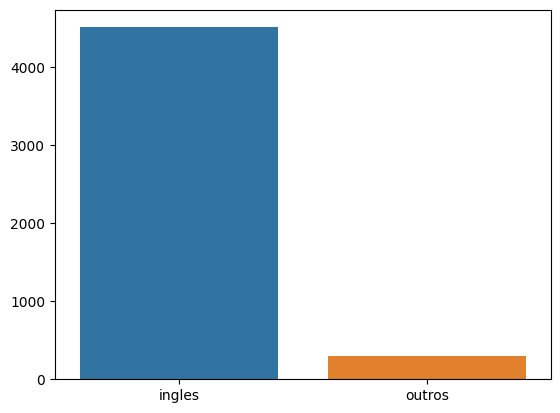

In [14]:
#Plotando os dados
sns.barplot(x="lingua", y="total", data=dados)

In [17]:
#fazendo uma query para filtrar os demais filmes que nao sao ingles e contando totais
tmdb.query("original_language != 'en'").original_language.value_counts()

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

In [34]:
#criando um data frame dos dados filtrados para trabalhar com eles
total_por_ligua_de_outros_filmes= tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_ligua_de_outros_filmes.head()
tota_sem_ligua_original_em_en= tmdb.query("original_language != 'en'")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


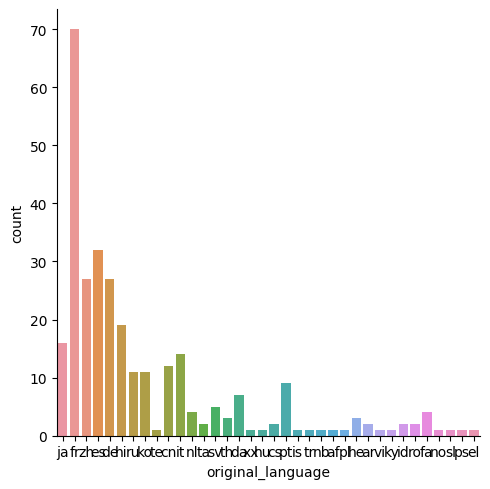

In [36]:
#plotando grafico
sns.catplot(x = "original_language", data = tota_sem_ligua_original_em_en, kind="count")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


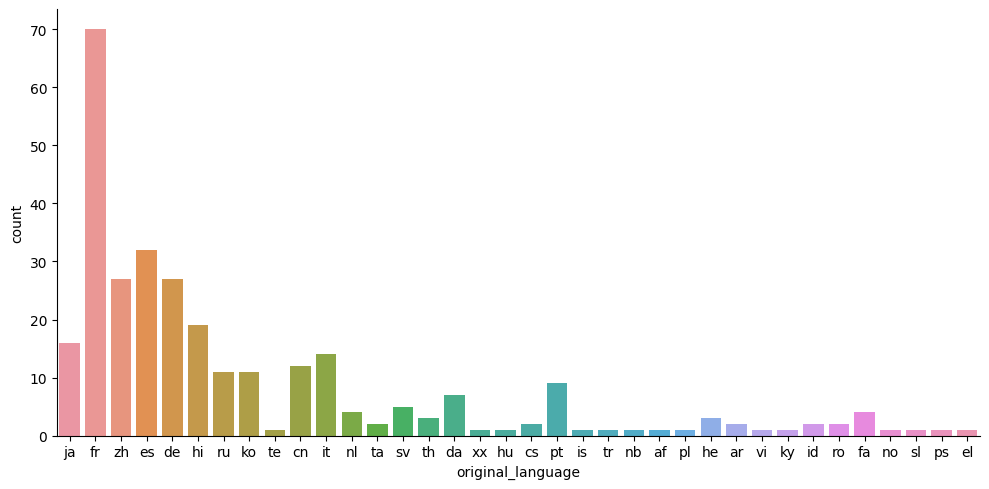

In [37]:
#melhorando a visualizacao sando os parametros do catplot
sns.catplot(x = "original_language", data = tota_sem_ligua_original_em_en, kind="count", aspect=2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


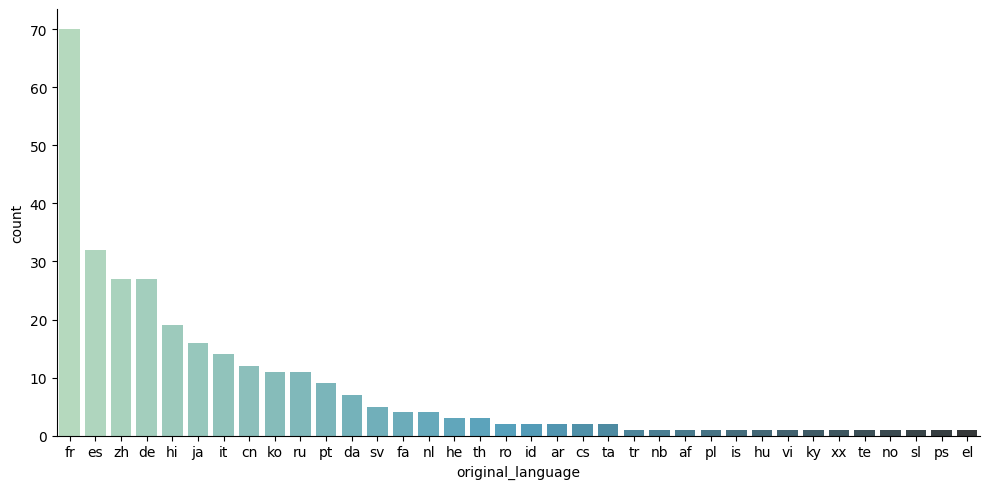

In [40]:
#Ordenando so filmes do maior ao menor usando o atributo criado anteriormente e adicionando uma paleta de cores
sns.catplot(x = "original_language", data = tota_sem_ligua_original_em_en, kind="count", aspect=2,palette="GnBu_d", order=total_por_ligua_de_outros_filmes.index)